In [1]:
# don't need on local
#!pip install git+https://github.com/modichirag/flowpm.git

In [2]:
#Setup
#%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline
#%matplotlib inline
#
# TF1 behavior
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf

#
from flowpm import linear_field, lpt_init, nbody, cic_paint
import flowpm

import pandas as pd 



stages = np.linspace(0.1, 1.0, 30, endpoint=True)

data_url = 'https://raw.githubusercontent.com/modichirag/flowpm/master/flowpm/data/Planck15_a1p00.txt'

D = pd.read_table(
    data_url, 
    sep=" ", 
    index_col=False,
    skiprows=2,
    names=["a","b"]
)
D.head()

Instructions for updating:
non-resource variables are not supported in the long term


,a,b
0,0.00001,44.656747
1,0.00001,45.056329
2,0.00001,45.459486
3,0.00001,45.866251
4,0.00001,46.276655


In [3]:
D = D.to_numpy()
klin = D.T[0]
plin = D.T[1]

print(klin)

[1.00000000e-05 1.00925754e-05 1.01860077e-05 ... 9.81738896e+02
 9.90827380e+02 1.00000000e+03]


In [4]:
ipklin = iuspline(klin, plin)


In [5]:
tf.reset_default_graph()

N = 64

initial_conditions = flowpm.linear_field(N,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial power spectrum
                                         batch_size=16)

# Sample particles
state = flowpm.lpt_init(
    initial_conditions, 
   0.1
)   



# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, N)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

In [6]:
#Execute the graph!
with tf.Session() as sess:
    ic, istate, fstate, sim = sess.run([initial_conditions, state, final_state, final_field])

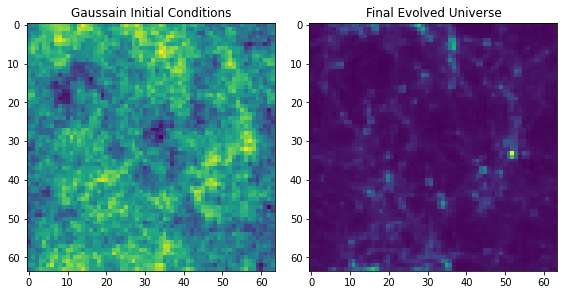

In [7]:
ib = 0  #index of the Universe in the batch

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(ic[ib].sum(axis=0))
ax[0].set_title('Gaussain Initial Conditions')
ax[1].imshow(sim[ib].sum(axis=0))
ax[1].set_title('Final Evolved Universe')
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, ''),
 Text(70.0, 0, '')]

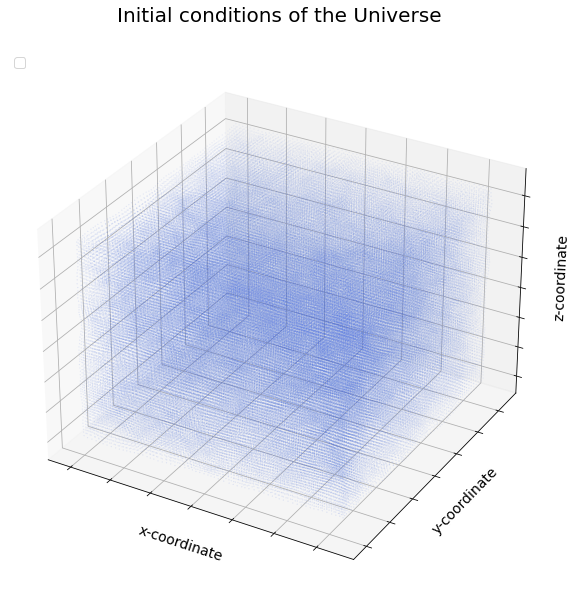

In [8]:
#Create figure
#Need to convert to physical coordinates
fig=plt.figure(figsize=(10,10))#Create 3D axes
try: ax=fig.add_subplot(111,projection="3d")
except : ax=Axes3D(fig) 
ax.scatter(istate[0, 0,:,0],istate[0, 0,:,1], istate[0, 0,:,2],color="royalblue",marker=".",s=.02)
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Initial conditions of the Universe\n",fontsize=20)
ax.legend(loc="upper left",fontsize=14)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
#plt.savefig('3dinitial.png', dpi=1200)

No handles with labels found to put in legend.


[Text(-20.0, 0, ''),
 Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, ''),
 Text(70.0, 0, ''),
 Text(80.0, 0, '')]

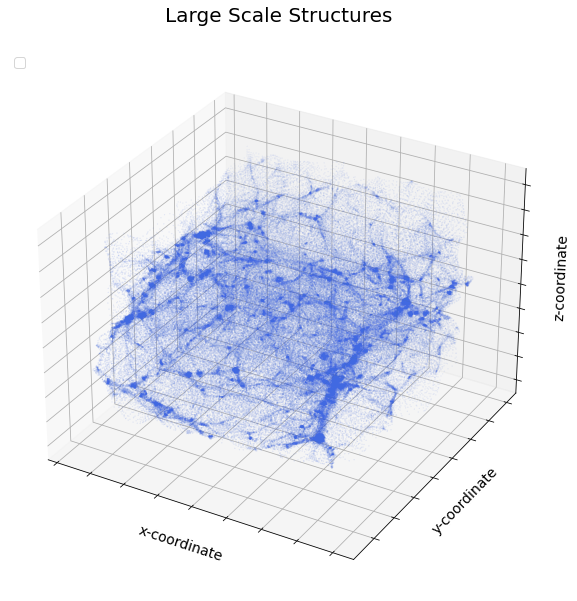

In [9]:
#Create figure
fig=plt.figure(figsize=(10,10))#Create 3D axes
try: ax=fig.add_subplot(111,projection="3d")
except : ax=Axes3D(fig) 
ax.scatter(fstate[0, 0,:,0],fstate[0, 0,:,1], fstate[0, 0,:,2],color="royalblue",marker=".",s=.02)
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Large Scale Structures\n",fontsize=20)
ax.legend(loc="upper left",fontsize=14)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
#plt.savefig('3dfinal.png', dpi=1200)

In [ ]:
# it works!

# next steps: dig into the specifics, what do each of the parameters mean?
# key ones are probably the linear power spectrum values